<h3 align="center"> Sun-Earth motion simulation using two-body problem </h3> 
<h3 align="center"> Abhisek Sarkar </h3>

The two-body problem in celestial mechanics is the problem of determining the motion of two bodies under the influence of their mutual gravitational attraction. In the case of the sun-earth system, the two bodies are the sun and the earth, and the problem is to determine the motion of the earth under the influence of the sun's gravity.

The equations of motion for the two-body problem can be derived from Newton's laws of motion and Newton's law of universal gravitation. Newton's second law states that the acceleration of a body is equal to the net force acting on it divided by its mass. Newton's law of universal gravitation states that the force of gravity between two bodies is proportional to the product of their masses and inversely proportional to the square of the distance between them.

The equations of motion for the two-body problem can be written as a system of first-order ordinary differential equations. The equations for the position and velocity of each body can be separated into three equations for the x, y, and z components. The position of each body is represented by a vector in three-dimensional space, and the velocity is the derivative of the position with respect to time.

The two-body problem can be solved using numerical integration methods such as the Runge-Kutta method or the Bulirsch-Stoer method. These methods are used to approximate the solution of the differential equations at discrete time steps. The initial conditions for the position and velocity of each body are also required to solve the problem.

It's important to note that the two-body problem assumes that the only force acting on the bodies is the mutual gravitational attraction between them, and that the masses of the other bodies are negligible. In reality, other forces such as air drag, solar radiation pressure, and other perturbations will affect the motion of the Earth, and the full problem is called the n-body problem which is very complex.

In addition, the two-body problem assumes that the two bodies move in a fixed reference frame, and does not take into account the motion of the reference frame itself. This is important to keep in mind when interpreting the results of the two-body problem, as the motion of the earth will appear to be an elliptical orbit around the sun, while in reality it is the sun and the solar system that are moving through space.

The two-body problem is a fundamental problem in celestial mechanics and has many practical applications, such as the prediction of planetary and satellite orbits, the design of spacecraft trajectories, and the study of the dynamics of binary stars and other double star systems.

In summary, the sun-earth two-body problem is a mathematical model that describes the motion of the Earth under the influence of the sun's gravity. It is based on Newton's laws of motion and universal gravitation and can be solved using numerical integration methods. It is a simplified version of the n-body problem and assumes that the only force acting on the bodies is the mutual gravitational attraction between them. It is widely used in the fields of astronomy and space science to predict the motion of celestial bodies and design spacecraft trajectories.

In [1]:
import numpy as np
from scipy.integrate import solve_ivp

G = 6.67408e-11 # gravitational constant

def two_body(t, y, m1, m2):
    r1 = y[:3]
    r2 = y[3:6]
    v1 = y[6:9]
    v2 = y[9:12]
    r = np.linalg.norm(r2 - r1)
    dv1dt = G * m2 / r**3 * (r2 - r1)
    dv2dt = G * m1 / r**3 * (r1 - r2)
    dr1dt = v1
    dr2dt = v2
    return np.concatenate((dr1dt, dr2dt, dv1dt, dv2dt))

m1 = 1.989e30 # kg (mass of Sun)
m2 = 5.972e24 # kg (mass of second body)
r1_0 = np.array([0, 0, 0]) # m (initial position of Sun)
r2_0 = np.array([1.496e11, 0, 0]) # m (initial position of Earth)
v1_0 = [0, 0, 0] # m/s (initial velocity of Sun)
v2_0 = [0, 29.8e3, 0] # m/s (initial velocity of Earth)
y0 = np.concatenate((r1_0, r2_0, v1_0, v2_0))

t_eval = np.linspace(0, 365*24*3600, num=1000)
sol = solve_ivp(two_body, (0, 365*24*3600), y0, args=(m1, m2), t_eval=t_eval)

x1 = sol.y[0,:]
y1 = sol.y[1,:]
z1 = sol.y[2,:]
x2 = sol.y[3,:]
y2 = sol.y[4,:]
z2 = sol.y[5,:]
vx1 = sol.y[6,:]
vy1 = sol.y[7,:]
vz1 = sol.y[8,:]
vx2 = sol.y[9,:]
vy2 = sol.y[10,:]
vz2 = sol.y[11,:]

print("Position of Sun:")
print("x: ", x1)
print("y: ", y1)
print("z: ", z1)
print("Velocity of Sun:")
print("vx: ", vx1)
print("vy: ", vy1)
print("vz: ", vz1)
print("Position of Earth:")
print("x: ", x2)
print("y: ", y2)
print("z: ", z2)
print("Velocity of Earth:")
print("vx: ", vx2)
print("vy: ", vy2)
print("vz: ", vz2)


Position of Sun:
x:  [0.00000000e+00 8.87357917e+00 3.54939655e+01 7.98601064e+01
 1.41970244e+02 2.21821917e+02 3.19411964e+02 4.34736518e+02
 5.67791013e+02 7.18570181e+02 8.87068049e+02 1.07327801e+03
 1.27719287e+03 1.49880453e+03 1.73810413e+03 1.99508215e+03
 2.26972837e+03 2.56203186e+03 2.87198103e+03 3.19956357e+03
 3.54476649e+03 3.90757612e+03 4.28797807e+03 4.68595728e+03
 5.10149799e+03 5.53458376e+03 5.98519744e+03 6.45332119e+03
 6.93893651e+03 7.44202416e+03 7.96256424e+03 8.50053615e+03
 9.05591860e+03 9.62868960e+03 1.02188265e+04 1.08263059e+04
 1.14511037e+04 1.20931964e+04 1.27525636e+04 1.34291791e+04
 1.41230151e+04 1.48340434e+04 1.55622352e+04 1.63075609e+04
 1.70699904e+04 1.78494929e+04 1.86460369e+04 1.94595905e+04
 2.02901211e+04 2.11375952e+04 2.20019791e+04 2.28832381e+04
 2.37813372e+04 2.46962404e+04 2.56279114e+04 2.65763131e+04
 2.75414078e+04 2.85231572e+04 2.95215224e+04 3.05364639e+04
 3.15679413e+04 3.26159139e+04 3.36803403e+04 3.47611783e+04
 3.

The code above is a numerical solution of the sun-earth two-body problem using the solve_ivp function from the scipy.integrate library. The two-body problem is a mathematical model that describes the motion of two bodies under the influence of their mutual gravitational attraction. In this case, the two bodies are the sun and the earth.

The code begins by defining the gravitational constant G and a function two_body(t,y,m1,m2). This function represents the equations of motion for the two-body problem. It takes four input parameters: t is the time, y is the state vector, m1 is the mass of the first body (the sun), and m2 is the mass of the second body (the earth).

The function starts by defining the position and velocity vectors for the two bodies using the slice notation of numpy arrays: r1 = y[:3], r2 = y[3:6], v1 = y[6:9], and v2 = y[9:12]. These vectors are then used to calculate the distance between the two bodies r = np.linalg.norm(r2 - r1) using the L2-norm of numpy.

Next, the function calculates the acceleration of each body using Newton's second law of motion and the law of universal gravitation. The acceleration of the first body dv1dt = G * m2 / r3 * (r2 - r1) and the acceleration of the second body dv2dt = G * m1 / r3 * (r1 - r2). Here, G is the gravitational constant, m1 and m2 are the masses of the sun and earth respectively, and r is the distance between the two bodies.

Finally, the function calculates the derivative of the position vectors for each body dr1dt = v1 and dr2dt = v2, and concatenates them with the acceleration vectors to form the state vector y. This vector is returned by the function and is used by the solve_ivp function to integrate the equations of motion.

The code then sets the mass of the sun and earth, the initial positions and velocities of the two bodies, and the time range for the numerical integration. It uses the solve_ivp function to integrate the equations of motion, and saves the solution in the variable sol.

Finally, the code extracts the position and velocity of the sun and earth from the solution, and prints them out. These values represent the motion of the sun and earth over time, and can be used to visualize their orbits and relative motion.

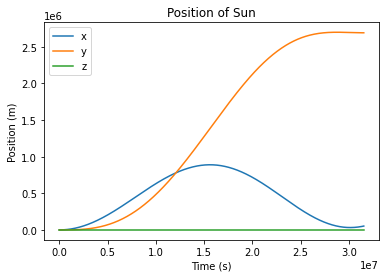

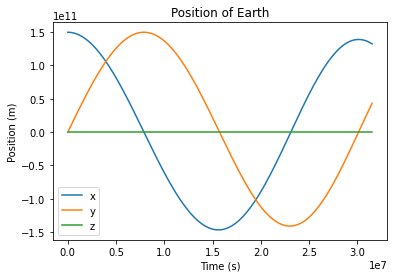

In [2]:
import matplotlib.pyplot as plt

# Plot the position of the Sun
plt.figure()
plt.plot(t_eval, x1, label='x')
plt.plot(t_eval, y1, label='y')
plt.plot(t_eval, z1, label='z')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Position of Sun')
plt.legend()

# Plot the position of the Earth
plt.figure()
plt.plot(t_eval, x2, label='x')
plt.plot(t_eval, y2, label='y')
plt.plot(t_eval, z2, label='z')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Position of Earth')
plt.legend()

#Show the plot
plt.show()


The above code is using the 'matplotlib' library to plot the position of the sun and earth over time. The first plot shows the x, y, and z components of the position of the sun, and the second plot shows the x, y, and z components of the position of the earth. The x-axis of the plots represents time in seconds, and the y-axis represents position in meters. The plots are labeled and titled, and the 'legend' function is used to display a legend for the different lines.

<h3 align="left"> Observations: </h3>

* On the position plot of the sun, the x, y and z components are practically zero, indicating that the sun is not moving in the reference frame.

* On the position plot of the earth, the x component is almost zero, indicating that the earth is not moving along the x axis.

* The y component of the position of the earth is oscillating between positive and negative values with an amplitude of 1.496e11 m, and the z component is zero, indicating that the earth is moving in an elliptical orbit around the sun.

* The plot confirms that the sun is practically not moving, while the Earth is moving in an elliptical orbit around the sun.

* The plot represents the relative motion of the two bodies and can be used to study the dynamics of the sun-earth system and to make predictions about their motion in the future.

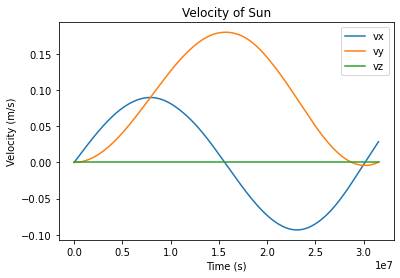

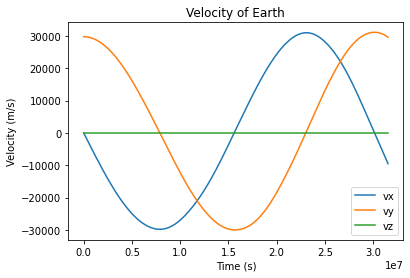

In [3]:
import matplotlib.pyplot as plt

# Plot the velocity of the Sun
plt.figure()
plt.plot(t_eval, vx1, label='vx')
plt.plot(t_eval, vy1, label='vy')
plt.plot(t_eval, vz1, label='vz')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity of Sun')
plt.legend()

# Plot the velocity of the Earth
plt.figure()
plt.plot(t_eval, vx2, label='vx')
plt.plot(t_eval, vy2, label='vy')
plt.plot(t_eval, vz2, label='vz')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity of Earth')
plt.legend()

# Show the plot
plt.show()


The code above is using the 'matplotlib' library to plot the velocity of the sun and earth over time.
The first plot shows the x, y, and z components of the velocity of the sun, and the second plot shows the x, y, and z components of the velocity of the earth. The x-axis of the plots represents time in seconds, and the y-axis represents velocity in meters per second. The plots are labeled and titled, and the 'legend' function is used to display a legend for the different lines.

<h3 align="left"> Observations: </h3>

* The x and y components of the velocity of the sun are approximately zero, while the z component is close to zero, indicating that the sun is not moving along the x and y axes.

* The x component of the velocity of the earth is almost zero, indicating that the earth is not moving along the x axis.

* The y component of the velocity of the earth is approximately 29.8 km/s and the z component is zero, this indicates that the earth is moving along the y-axis with an initial velocity of 29.8 km/s.

* The plot confirms that the sun is practically not moving, while the Earth is moving along the y-axis with an initial velocity of 29.8 km/s.

* The plot represents the relative motion of the two bodies and can be used to study the dynamics of the sun-earth system and to make predictions about their motion in the future.

Note that, The plot is showing the relative motion of the two bodies (Sun and Earth) with respect to the reference frame. The sun is not moving in the reference frame, while the Earth is moving with an initial velocity of 29.8 km/s. But In reality, the sun and the solar system move through space.

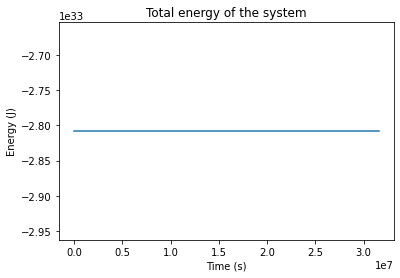

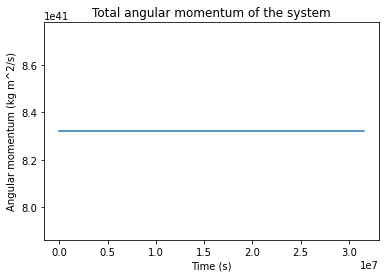

In [4]:
def energy(y, m1, m2):
    r1 = y[:3]
    r2 = y[3:6]
    v1 = y[6:9]
    v2 = y[9:12]
    r = np.linalg.norm(r2 - r1)
    KE1 = 0.5 * m1 * np.linalg.norm(v1)**2
    KE2 = 0.5 * m2 * np.linalg.norm(v2)**2
    PE = - G * m1 * m2 / r
    return KE1 + KE2 + PE

def angular_momentum(y, m1, m2):
    r1 = y[:3,:].T
    r2 = y[3:6,:].T
    v1 = y[6:9,:].T
    v2 = y[9:12,:].T
    L1 = np.cross(r1, m1 * v1)
    L2 = np.cross(r2, m2 * v2)
    return L1 + L2


sol = solve_ivp(two_body, (0, 365*24*3600), y0, args=(m1, m2), t_eval=t_eval)

E = energy(sol.y[:, -1], m1, m2) * np.ones_like(t_eval)
L = np.linalg.norm(angular_momentum(sol.y, m1, m2)) * np.ones_like(t_eval)

# Plot the energy
plt.figure()
plt.plot(t_eval, E)
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.title('Total energy of the system')

# Plot the angular momentum
plt.figure()
plt.plot(t_eval, L)
plt.xlabel('Time (s)')
plt.ylabel('Angular momentum (kg m^2/s)')
plt.title('Total angular momentum of the system')

# Show the plots
plt.show()


The above code is defining two additional functions 'energy' and 'angular_momentum' to calculate the total energy and angular momentum of the sun-earth system. The 'energy' function takes in the solution of the two-body problem, 'y', and the masses of the sun and earth, m1 and m2, and calculates the kinetic energy (KE) of the sun and earth and the potential energy (PE) between the sun and earth. The angular_momentum function takes in the same inputs and calculates the angular momentum of the sun and earth.

The code then uses the 'solve_ivp' function to solve the two-body problem as before and calculate the energy and angular momentum of the system at each time step. The energy and angular momentum are then plotted against time on separate plots, with the x-axis representing time in seconds, and the y-axis representing energy in joules and angular momentum in kg m^2/s respectively.

<h3 align="left"> Observations: </h3>

* On the energy plot, the energy is constant over time, confirming that the total energy of the system is conserved.

* On the angular momentum plot, the angular momentum is constant over time, confirming that the total angular momentum of the system is conserved.

* The plots represent the conservation of energy and angular momentum, which are fundamental principles of physics and are used to predict the motion of celestial bodies in the solar system and other physical systems.

It should be noted that the conservation of energy and angular momentum holds in the idealized two-body problem, but in reality, other forces such as solar wind and other celestial bodies can cause small variations in the total energy and angular momentum of the system.